# Diabetes Prediction
Diabetes mellitus commonly known as diabetes, is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time. If left untreated, diabetes can cause many complications. 

In [1]:
# import the data frame
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
# print first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Types of Diabetes

Type -I: It results from the pancreas's failure to produce enough insulin due to loss of beta cells. Also known as "Insulin Dependent Diabetes Mellitus(IDDM)".

Type -II: It begins with Insulin resistance, a condition in which cells to respond to insulin properly. Also known as "Non-Insulin Depenent Diabetes mellitus(NIDDM)".

Gestational Diabetes : It develops in some women when they are pregnant. Most of this time, this type of diabetes goes away after the baby is born. However, you have a greater chance of developing type 2 diabetes later in life.

# Glucose:

Blood Sugar or glucose is the main sugar in our blood. It comes from the food we eat. Blood carries glucose to all of our body's cells to use for energy.

Oral glucose tolerance test:

The glucose tolerance test, also known as the oral glucose tolerance test, measures your body's response to sugar(glucose).

Glucose level after an oral glucose tolerance test

Normal - glucose level less than 140mg/dL

Diabetes - glucose level more than 200mg/dL 

Prediabetes - glucose level between 140 - 199mg/dL


# Blood Pressure

Blood pressure is the pressure of circulating blood against the walls of blood vesells.
Systolic BP : It is the pressure when the heart muscle is contracting and pumping oxygen rich blood into blood vessels
Diastolic BP: It is the pressure on the blood vessels when heart muscle relaxes.

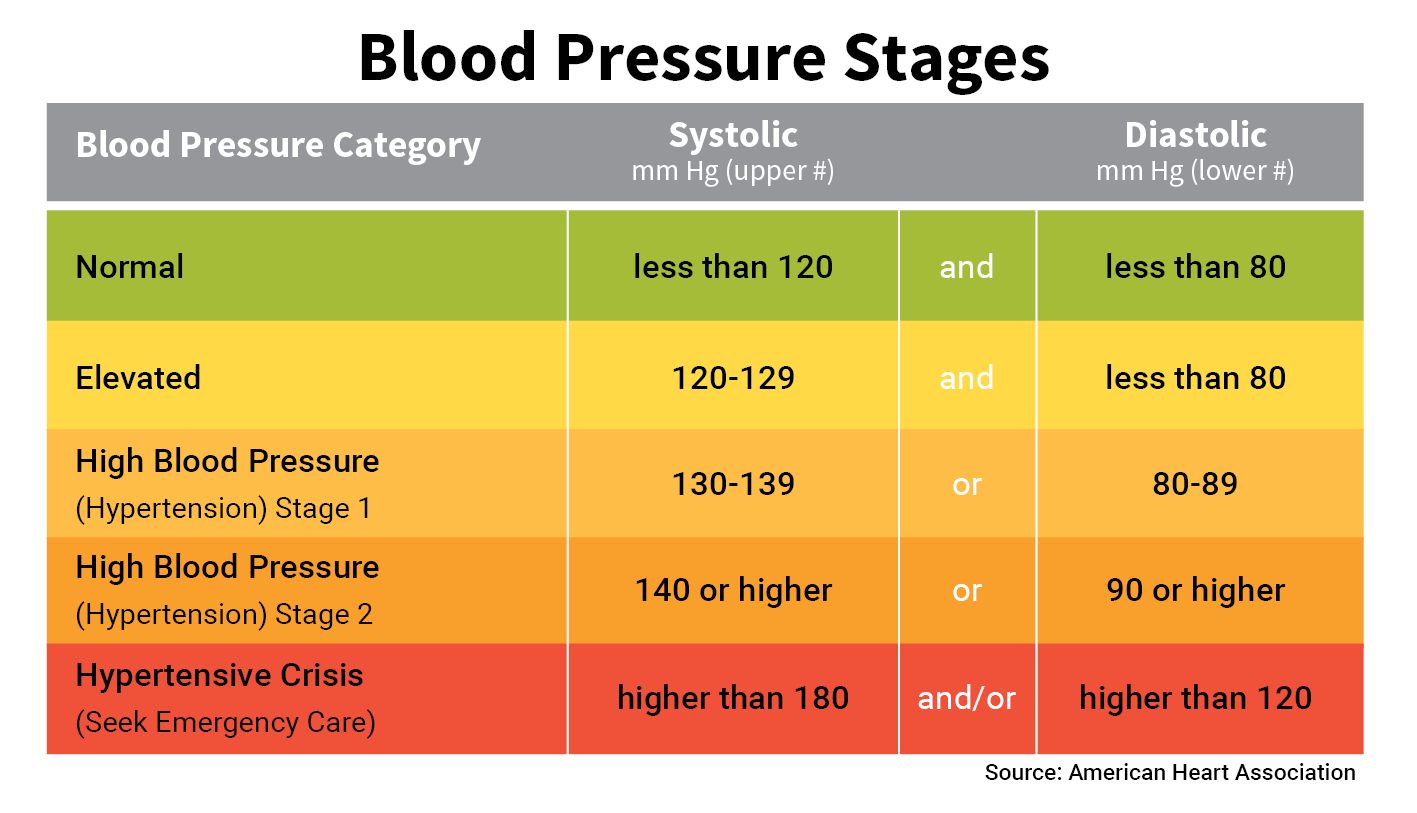


# Insulin
Insulin is a harmone made in pancreas. It allows body to use glucose for energy. 


# BMI

BMI is measurement of person's leanness or corpulence based on their height and weight, and is intended to quantify tissue mass.
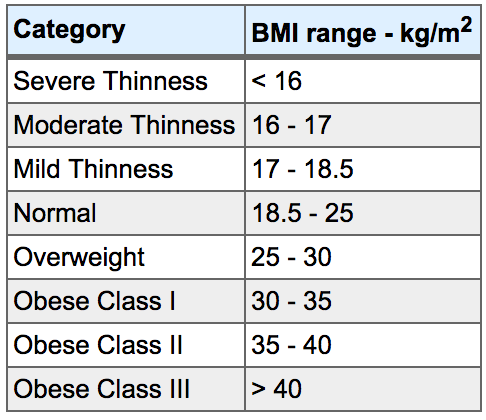

# Skin Thickness

Thick skin on the dorsum of the hands and fingers is a common finding in diabetes mellitus, and that affected person have an increased prevalence of diabetic retinal microvascular disease.


# Diabetes Pedigree Function
 Diabetes Pedigee function a function which scores likelihood of diabetes based on family history

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# to view the summary of the Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Observations:
All the observations were female.

Minimum value of Glucose, Blood Pressure, Skin Thickness, Insulin, BMI looks unreal.

Replace 0 with NaN in the above features.

maximum value of Preganacies is 17

In [5]:
# Function to replace 0 with NaN
import numpy as np
def replace_0_NaN(df):
    df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 
                                                                              'Insulin', 'BMI']].replace(0, np.NaN)
    return df

In [6]:
df = replace_0_NaN(df)

In [7]:
# Proportion of Missing values
df.isnull().sum()/768

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [8]:
 # replace missing value with median
def median_target(df, variable):   
    temp = df[df[variable].notnull()]
    temp = df[[variable, 'Outcome']].groupby(['Outcome'])[[variable]].median()
    return temp

In [9]:
features = ['Insulin', 'BloodPressure', 'SkinThickness', 'Glucose', 'BMI']
for feature in features:
    print(median_target(df, feature))

         Insulin
Outcome         
0          102.5
1          169.5
         BloodPressure
Outcome               
0                 70.0
1                 74.5
         SkinThickness
Outcome               
0                 27.0
1                 32.0
         Glucose
Outcome         
0          107.0
1          140.0
          BMI
Outcome      
0        30.1
1        34.3


In [10]:
def replace_NaN(df, features):
    for feature in features:
        negative = median_target(df,feature)[feature].iloc[0]
        positive = median_target(df,feature)[feature].iloc[1]
        df.loc[(df['Outcome'] == 0 ) & (df[feature].isnull()), feature] = negative
        df.loc[(df['Outcome'] == 1 ) & (df[feature].isnull()), feature] = positive
    return df

In [11]:
df = replace_NaN(df, features)

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# change the dtype of Outcome variable into Category
df = df.astype({"Outcome":"category"})

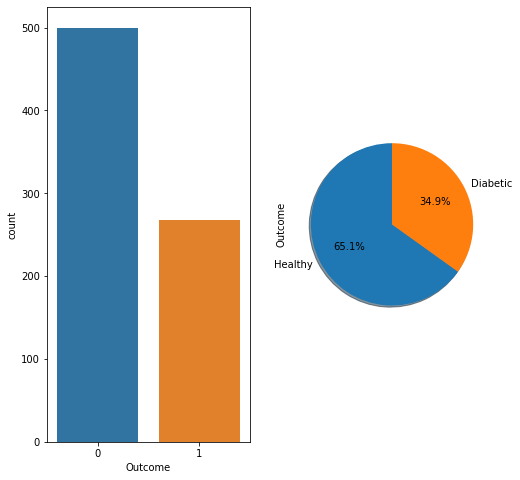

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))
sns.countplot(df['Outcome'],ax=ax1[0])
labels = 'Healthy', 'Diabetic'
df['Outcome'].value_counts().plot.pie(labels = labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

The pieplot shows that 65.1% people are healthy and 34.9% are having diabetes. The data is slightly biased towards people who are healthy

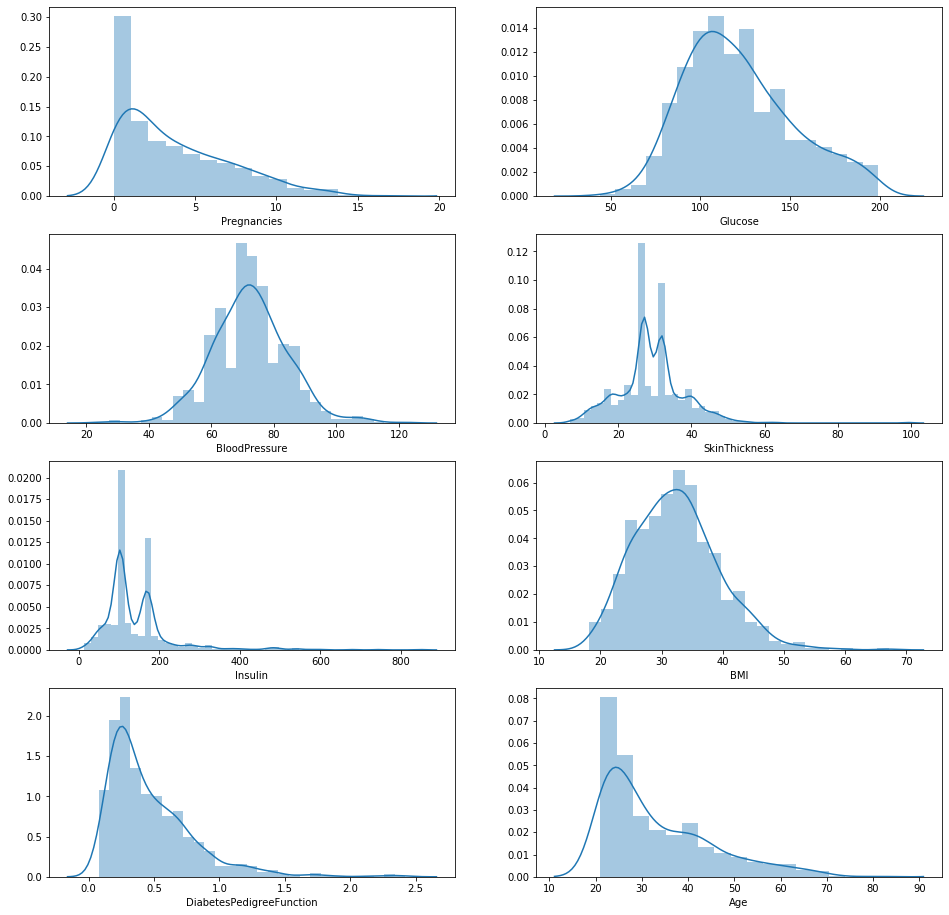

In [15]:
# Distplot
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(df['Pregnancies'],ax=ax2[0][0])
sns.distplot(df['Glucose'],ax=ax2[0][1])
sns.distplot(df['BloodPressure'],ax=ax2[1][0])
sns.distplot(df['SkinThickness'],ax=ax2[1][1])
sns.distplot(df['Insulin'],ax=ax2[2][0])
sns.distplot(df['BMI'],ax=ax2[2][1])
sns.distplot(df['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(df['Age'],ax=ax2[3][1])
plt.show()

The plot shows that Glucose, BMI, Blood Pressure are normally distributed. Pregnancies, Insulin, DiabetesPedigreeFunction are rightly skewed.

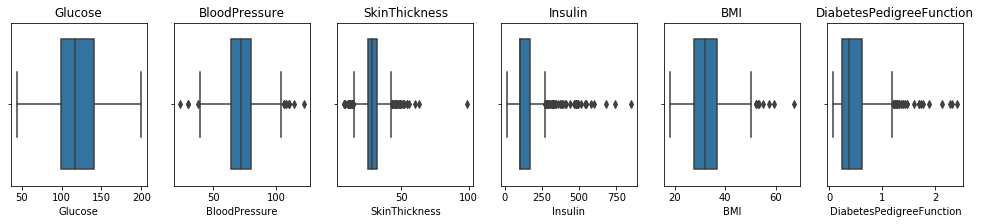

In [16]:
# Box Plot
fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

Blood Pressure, SkinThickness, Insulin and BMI have outliers

In [17]:
# correlation Matrix
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000


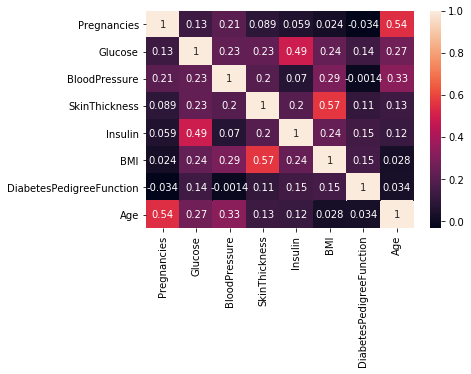

In [18]:
# heat map
sns.heatmap(corr, annot = True)
plt.show()

In [19]:
# Analysis of Age Parameter
dt = df[df['Outcome']==1][['Age']]
for i in dt.index:
    if dt['Age'][i] <= 24:
        dt['Age'][i] = '21-24'
    elif dt['Age'][i] <=30:
        dt['Age'][i] = '25-30'
    elif dt['Age'][i] <=40:
        dt['Age'][i] = '31-40'
    elif dt['Age'][i] <= 55:
        dt['Age'][i] = '41-55'
    else:
        dt['Age'][i] = '>55'

In [20]:
dt['Age'].value_counts()/268 *100

41-55    31.716418
31-40    28.358209
25-30    22.014925
21-24    11.567164
>55       6.343284
Name: Age, dtype: float64

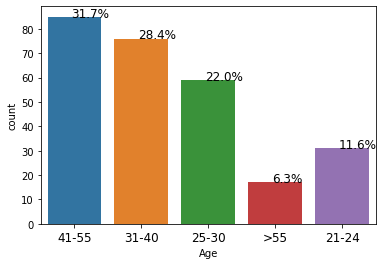

In [21]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

ax = sns.countplot('Age', data = dt)
plt.xticks(size=12)
without_hue(ax, dt.Age)

It is evident from the barplot that percentage of women diagonosed with diabetic are in the age group between(31-55 --- 60.09%). It means that middle aged women are most likely to be diabetic than young or old women

In [22]:
# Pregnancies
def make_plot(feature):
    fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
    sns.boxplot(x="Outcome", y=feature, data=df,ax=ax2[0][0])
    #sns.barplot(df['Outcome'], df[feature],ax=ax2[0][1])
    sns.stripplot(df['Outcome'], df[feature], jitter=True,ax=ax2[0][1])
    sns.swarmplot(df['Outcome'], df[feature], ax=ax2[1][0])
    sns.violinplot(df['Outcome'], df[feature], ax=ax2[1][1])
    #sns.countplot(x=feature,hue='Outcome',data=df,ax=ax2[2][1])
    plt.show()

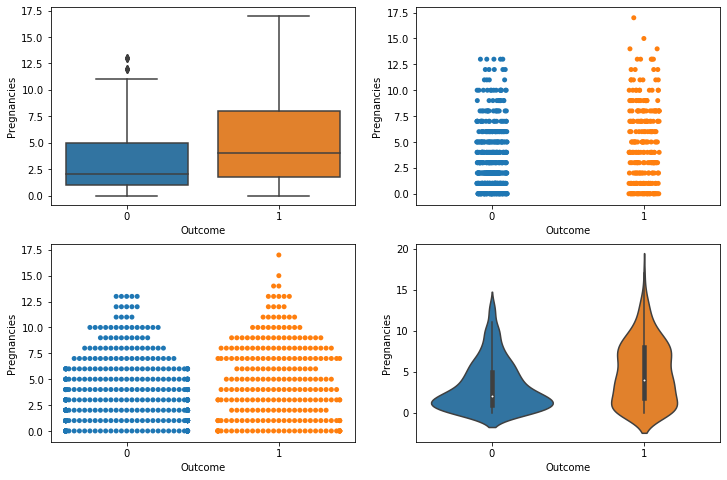

In [23]:
make_plot('Pregnancies')

These plots shows that people who often pregnant have more chances of diabetes

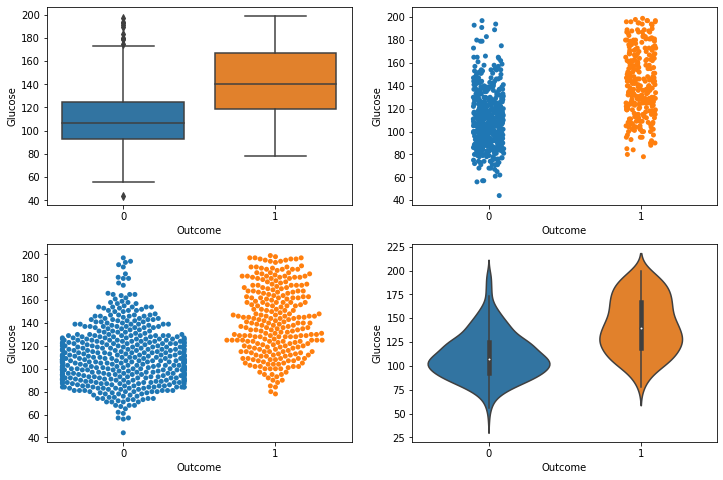

In [24]:
# Glucose
make_plot('Glucose')

These plots clearly shows that women having high Blood Sugar particularly  >140 have more chaces of diabetes

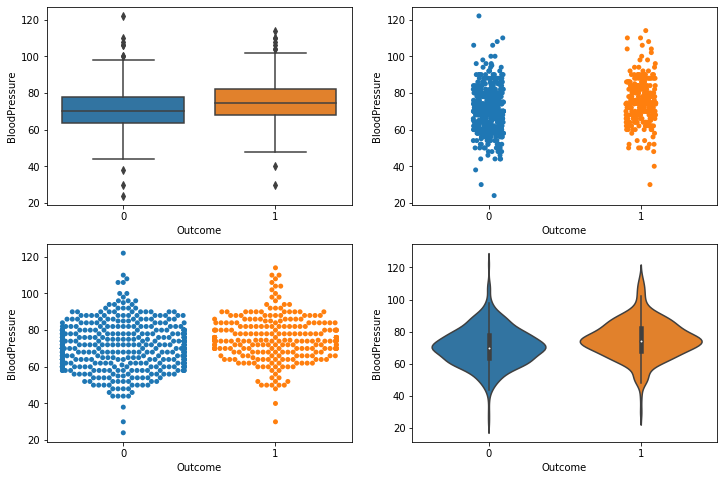

In [25]:
# Blood Pressure
make_plot('BloodPressure')

From these plots we can say that Blood Pressure has not played a vital role in predicting diabetes

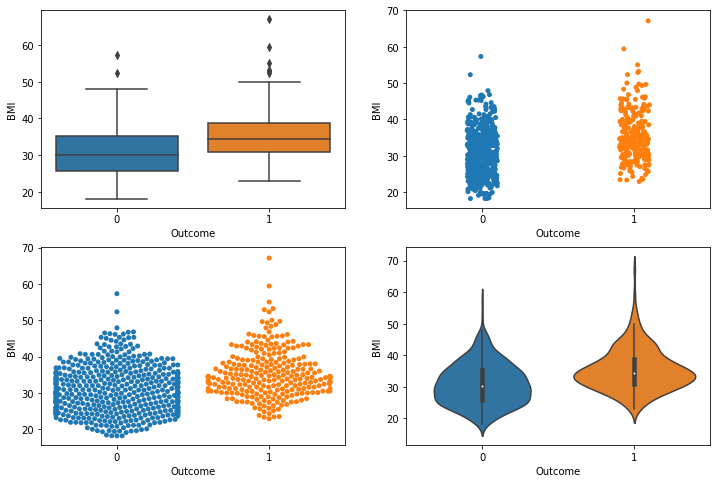

In [26]:
# BMI
make_plot('BMI')

These plots shows that women who are obese may have high chance of diabetes than others

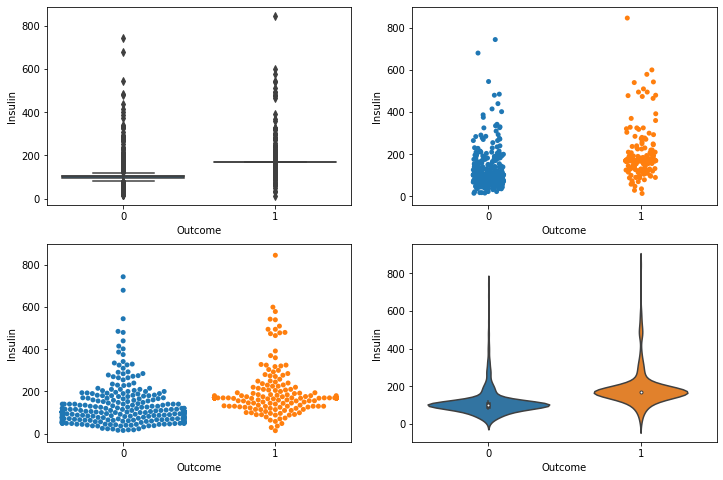

In [27]:
make_plot('Insulin')

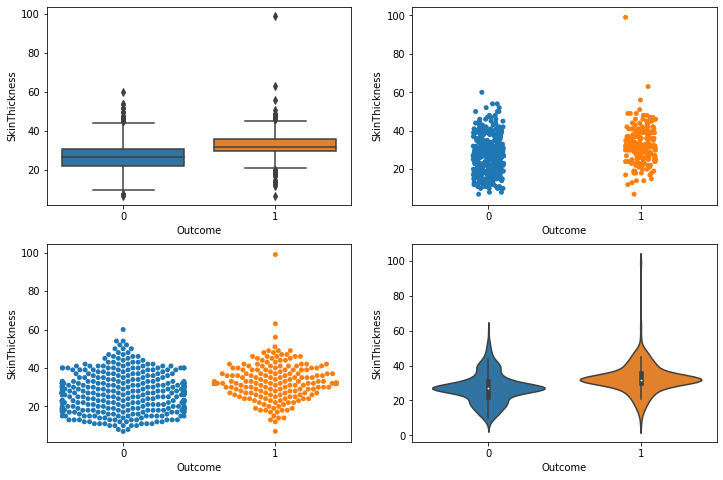

In [28]:
make_plot('SkinThickness')

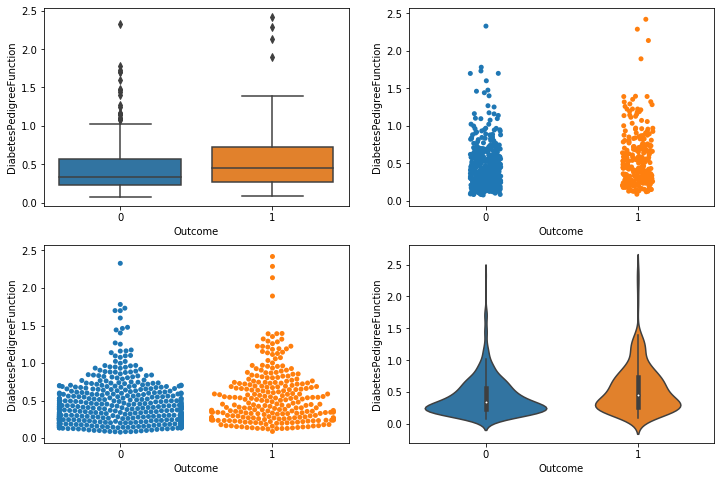

In [29]:
make_plot('DiabetesPedigreeFunction')

# Feature Engineering

In [30]:
# removing outliers in Insulin
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

In [31]:
# Bucketing BMI into 4 levels
df['BMI'] = pd.cut(x = df['BMI'], bins = [0, 18.5, 24.9, 29.9,100], labels = ['Underweight', 'Normal', 'Overweight','Obese'])

In [32]:
# Bucketing BloodPressure into 4 levels
df['BloodPressure'] = pd.cut(x = df['BloodPressure'], bins=[0,80,90,120,150], labels = ['Normal','Hyper_St1','Normal_St2','Hyper_Emer'])

In [33]:
# Bucketing Glucose into 3 levels
df['Glucose'] = pd.cut(x=df['Glucose'], bins=[0,140,200,300], labels = ['Normal', 'Prediabetes', 'Diabetes'])

In [34]:
# Bucketing Insulin into 2 levels
df['Insulin'] = df['Insulin'].apply(lambda  x : 'Normal' if x >= 100 and x <=126 else "Abnormal")

# One-Hot Encoding

In [35]:
def onehot_variables(df):
    onehot_columns = pd.get_dummies(df[['BMI','BloodPressure','Glucose','Insulin']],drop_first = True)
    df = pd.concat([df,onehot_columns],axis=1)
    df = df.drop(['BMI','BloodPressure','Glucose','Insulin'],axis=1)
    return df 

In [36]:
df = onehot_variables(df)

In [37]:
df.head()

,Pregnancies,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,BMI_Normal,BMI_Overweight,BMI_Obese,BloodPressure_Hyper_St1,BloodPressure_Normal_St2,BloodPressure_Hyper_Emer,Glucose_Prediabetes,Glucose_Diabetes,Insulin_Normal
0,6,35.0,0.627,50,1,0,0,1,0,0,0,1,0,0
1,1,29.0,0.351,31,0,0,1,0,0,0,0,0,0,1
2,8,32.0,0.672,32,1,1,0,0,0,0,0,1,0,0
3,1,23.0,0.167,21,0,0,1,0,0,0,0,0,0,0
4,0,35.0,2.288,33,1,0,0,1,0,0,0,0,0,0


# Training the Models

In [38]:
# train_test_split
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'],axis=1)
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [39]:
# Apply Standard Scaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
transformer = ColumnTransformer(transformers=[('sc', StandardScaler(), [0, 1, 2, 3])], remainder='passthrough')
X_train = transformer.fit_transform(X_train)

In [40]:
X_test = transformer.transform(X_test)

In [41]:
# fitting the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

models = [('RF', RandomForestClassifier()),
          ('GBM',GradientBoostingClassifier()),
          ('LR', LogisticRegression()),
          ("SVM", SVC()),
          ('KNN', KNeighborsClassifier())]

In [42]:
for name, model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    acc = accuracy_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    msg = "%s %f %f" %(name, acc, f1)
    print(msg)

RF 0.870130 0.803922
GBM 0.863636 0.783505
LR 0.889610 0.828283
SVM 0.863636 0.778947
KNN 0.805195 0.705882


Since Logistic Regression has the highest Accuracy score and F1-Score it is selected as the final model

# Hyperpameter Tuning

In [43]:
# tune the hyperparameters to select the best parameter for prediction
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l2'], 'C':[0.001, 0.01, 0.1, 1,10,100,1000]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid, cv=5, scoring='f1')

In [44]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             scoring='f1')

In [45]:
logreg_cv.best_params_

{'C': 10, 'penalty': 'l2'}

In [46]:
prediction = logreg_cv.predict(X_test)

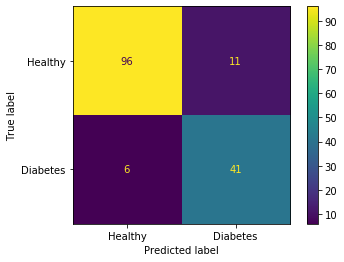

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_cv, X_test, y_test, display_labels = ['Healthy', 'Diabetes'])
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       107
           1       0.79      0.87      0.83        47

    accuracy                           0.89       154
   macro avg       0.86      0.88      0.87       154
weighted avg       0.89      0.89      0.89       154



# Save the Model to reuse it again

In [49]:
import pickle
# open the file to store the data
file = open('diabetes_logreg.pkl','wb')

# dump information to that file
pickle.dump(logreg_cv, file)

In [50]:
file = open('df.pkl','wb')

# dump information to that file
pickle.dump(df, file)